In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
d = pd.read_csv('data.csv', delimiter=',', encoding='ISO-8859-1')

In [4]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df=d
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.shape

(406829, 8)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [13]:
df[df['Quantity']<0].shape

(8905, 8)

In [14]:
df=df[df['Quantity']>0]

In [15]:
df[df['Quantity']<0].shape

(0, 8)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
df['Sales'] = df['Quantity']*df['UnitPrice']

<ipython-input-17-669e7950fa10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity']*df['UnitPrice']


In [18]:
new_data = df.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [19]:
num_trans = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


**Calc. last transaction**


In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last transaction'] = (df['InvoiceDate'].max()-df['InvoiceDate']).dt.days


<ipython-input-20-d3df31437474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-20-d3df31437474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last transaction'] = (df['InvoiceDate'].max()-df['InvoiceDate']).dt.days


In [21]:
temp = df.groupby(['CustomerID','Country'])['Last transaction'].max().reset_index()
temp.head()

,CustomerID,Country,Last transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309


In [22]:
merge = pd.merge(temp,num_trans,on='CustomerID',how='inner')
merge = pd.merge(merge,new_data,on='CustomerID',how='inner')
merge

,CustomerID,Country,Last transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


In [23]:
new_df = merge

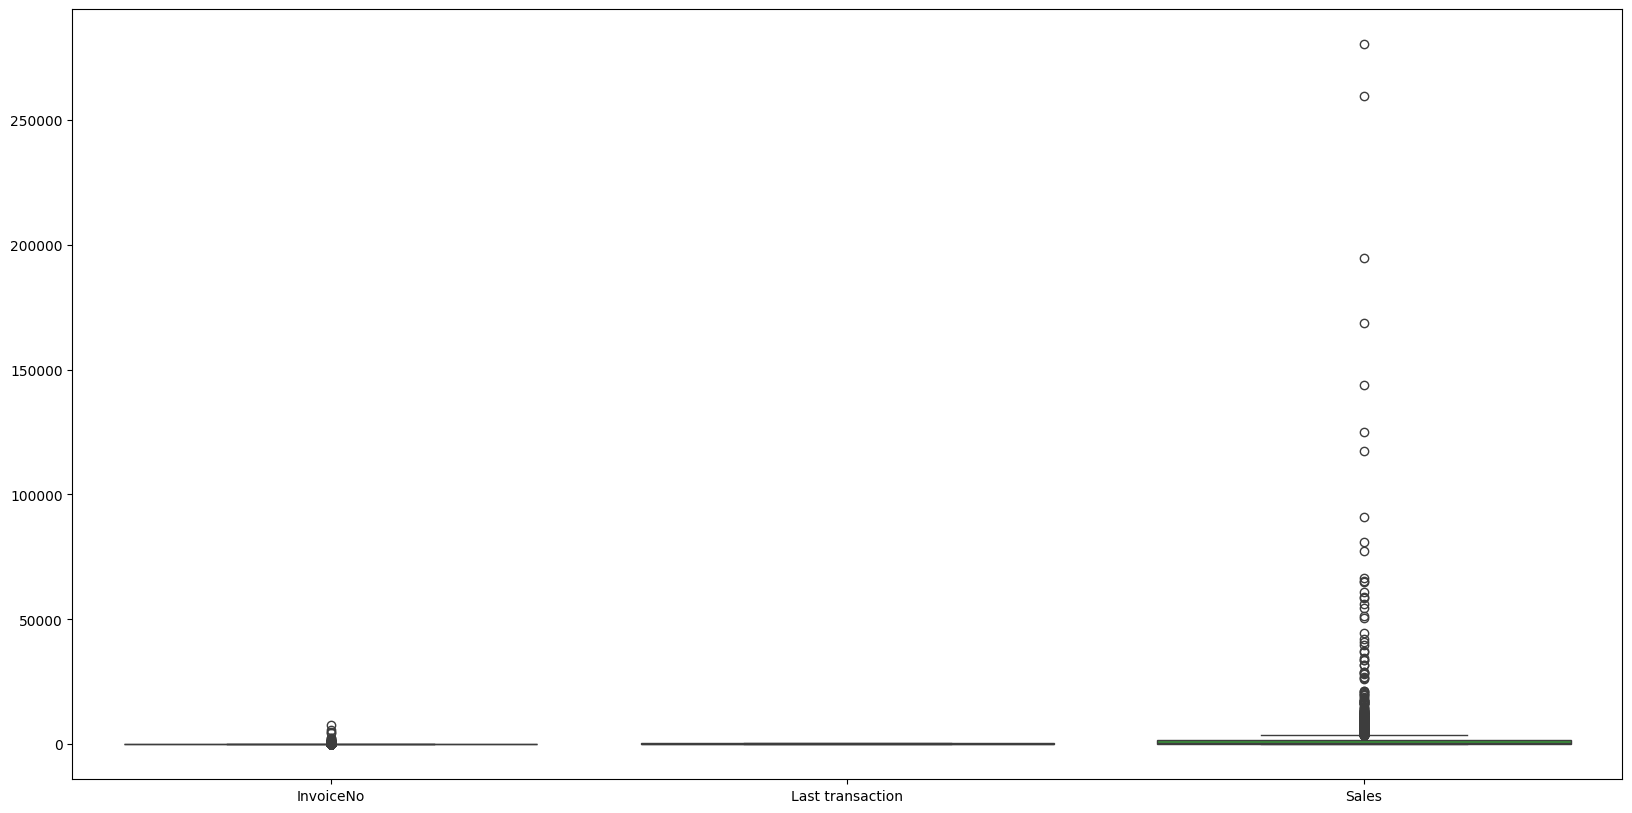

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last transaction', 'Sales']])
plt.show()

**Remove Outliers**


In [25]:
Q1 = new_df.Sales.quantile(0.25)
Q3 = new_df['Sales'].quantile(0.75)
IQR = Q3 -Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR
mask = new_df.Sales.between(lower_limit,upper_limit)
new_df_iqr = new_df[mask]

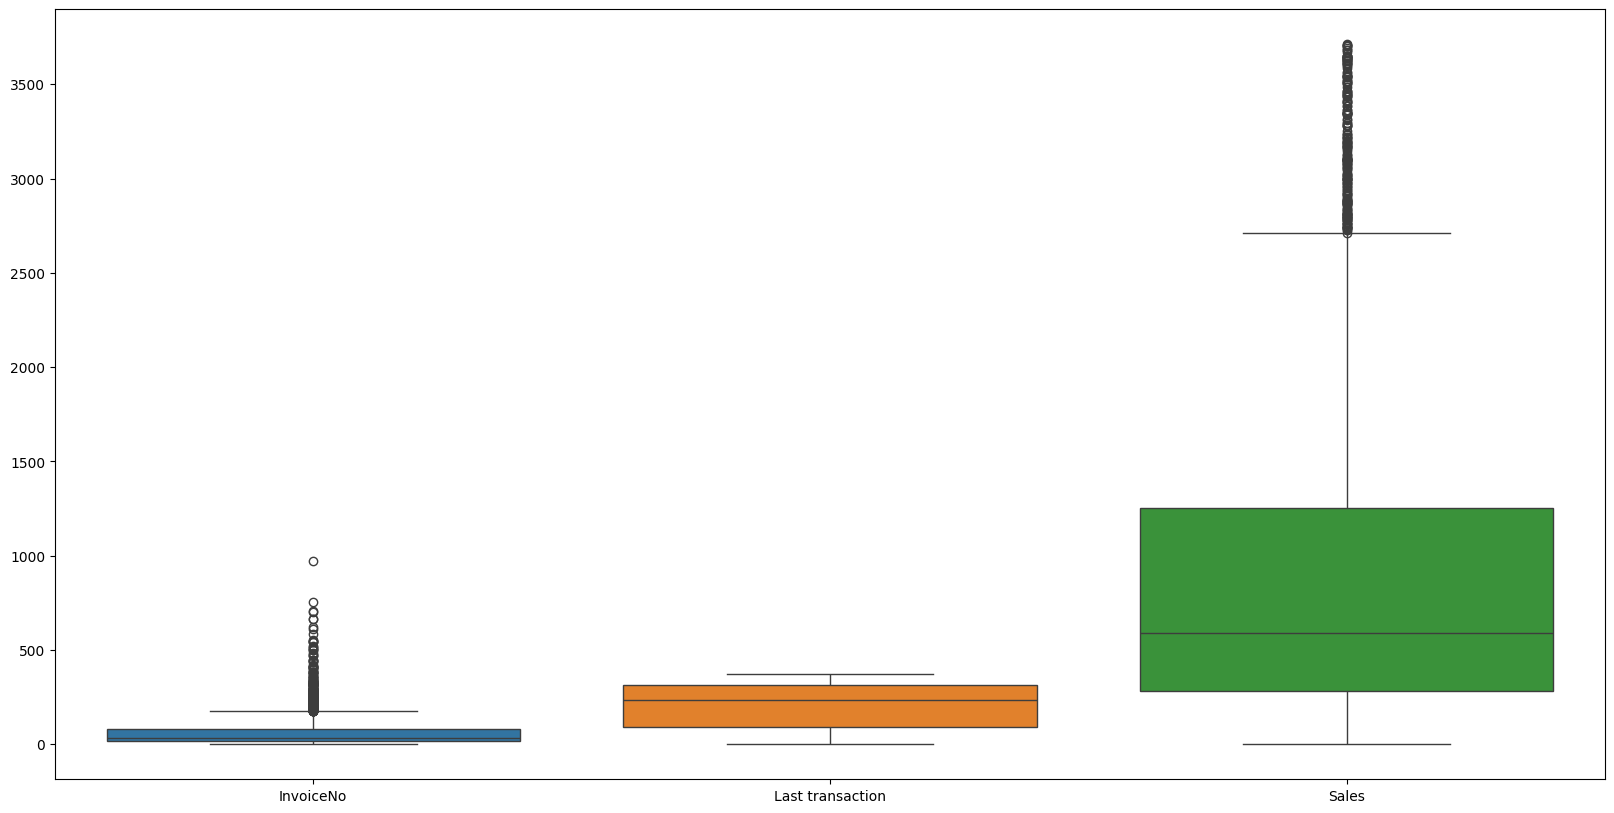

In [26]:
new_df_iqr.reset_index(drop=True,inplace=True)
plt.figure(figsize=(20,10))
sns.boxplot(data = new_df_iqr[['InvoiceNo', 'Last transaction', 'Sales']])
plt.show()

In [27]:
numeric_df = new_df_iqr.drop('Country',axis=1)


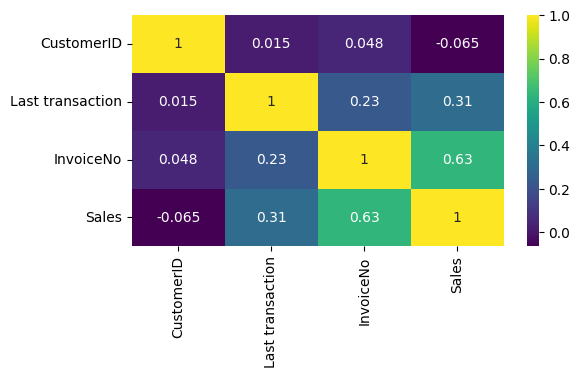

In [28]:
plt.figure(figsize = (6,3))
sns.heatmap(data=numeric_df.corr(),annot=True, cmap='viridis')
plt.show()

**STANDARDISATION USING MIN-MAX-SCALER**


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df_iqr[['InvoiceNo', 'Last transaction', 'Sales']])


In [30]:
scaled = pd.DataFrame(scaled)


In [31]:
scaled.columns = ['InvoiceNo', 'Last transaction', 'Sales']
scaled['Country']  = new_df_iqr['Country']
scaled.head()

,InvoiceNo,Last transaction,Sales,Country
0,0.030960,0.957105,0.484200,Finland
1,0.074303,0.048257,0.473507,Italy
2,0.016512,0.828418,0.090092,Norway
3,0.086687,0.793566,0.675160,Norway
4,0.003096,0.544236,0.023978,Bahrain


**K-Means Clustering - Plotting the Graph using Elbow Method:**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

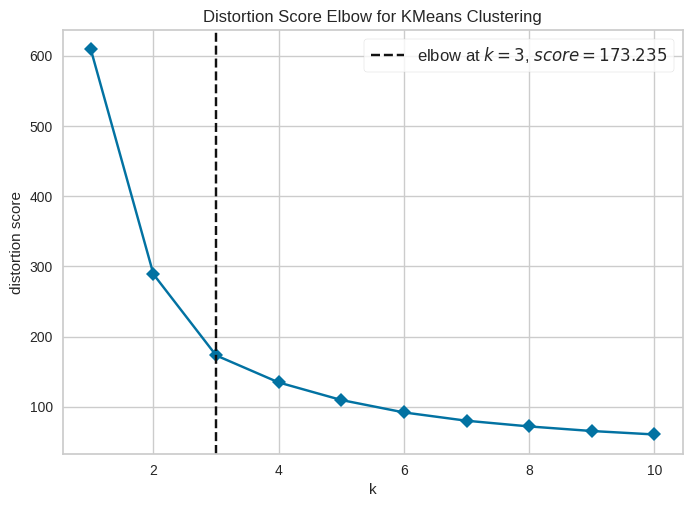

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
df_k = scaled.drop('Country',axis=1)

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,11),timings=False)
visualizer.fit(df_k)
visualizer.show()

**PERFORMANCE EVALUATION**


In [50]:
df2 = df_k.copy()

In [53]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df2)
df2['clusters'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
df2.head()

,InvoiceNo,Last transaction,Sales,clusters
0,0.030960,0.957105,0.484200,0
1,0.074303,0.048257,0.473507,2
2,0.016512,0.828418,0.090092,1
3,0.086687,0.793566,0.675160,0
4,0.003096,0.544236,0.023978,1


In [55]:
km.cluster_centers_



array([[ 1.58257093e-01,  7.97963671e-01,  6.33240648e-01,
        -2.22044605e-15],
       [ 4.27047147e-02,  7.76487118e-01,  1.57497113e-01,
         2.00000000e+00],
       [ 4.00264880e-02,  2.20584546e-01,  1.48504618e-01,
         1.00000000e+00]])

In [47]:
# MODEL EVALUATION

In [56]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df2,km.labels_,metric='euclidean')
print(score)

0.7738379838035234


In [71]:
#AgglomerativeClustering

In [72]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
y_pred = hierarchical.fit_predict(df2)
df2['cluster-hierarchical'] = y_pred


In [73]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df2,hierarchical.labels_,metric='euclidean')
print(score)

0.8451828773992158


**DBSCAN CLUSTERING**


In [74]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples = 4 )
y_predicted_dbscan = dbscan.fit_predict(df2)
df2['clusters_dbscan'] = y_predicted_dbscan


In [75]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df2,dbscan.labels_,metric='euclidean')
print(score)

0.8511313049052621
